01. Import Libraries and Data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
#Import Data
path=r'/Users/jakeupchurch/Documents/Instacart Basket Analysis'

In [3]:
df_ords_customers=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_12102023.pkl'))

In [4]:
df_ords_customers.shape

(32434212, 33)

02. Exercise with Bar Chart/Scatterplot/Histogram/Line Chart

<Axes: xlabel='orders_day_of_week'>

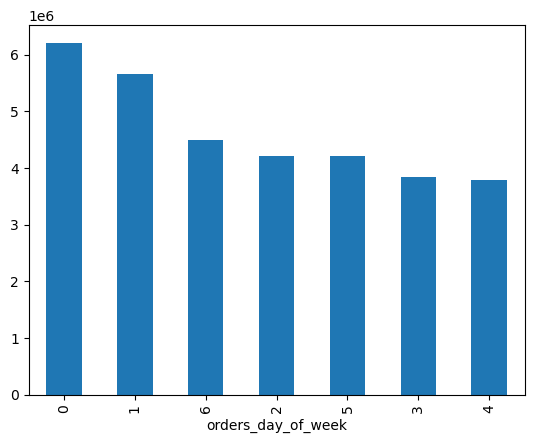

In [5]:
#Create Bar Chart
df_ords_customers['orders_day_of_week'].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

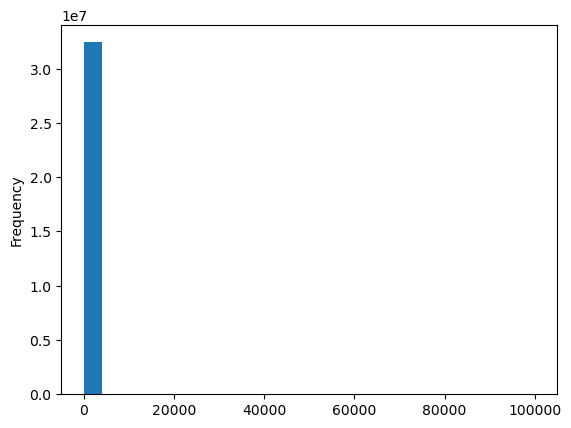

In [6]:
#Create Histogram
df_ords_customers['prices'].plot.hist(bins = 25)

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

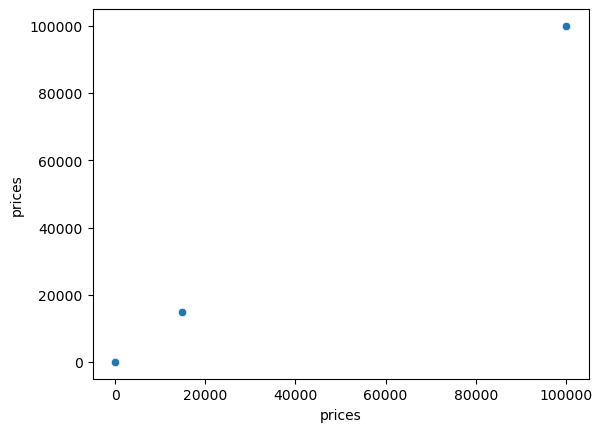

In [7]:
#Create Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_customers)

In [9]:
#Fixing Bar Chart
df_ords_customers.loc[df_ords_customers['prices'] >100, 'prices'] = np.nan

In [10]:
df_ords_customers['prices'].max()

25.0

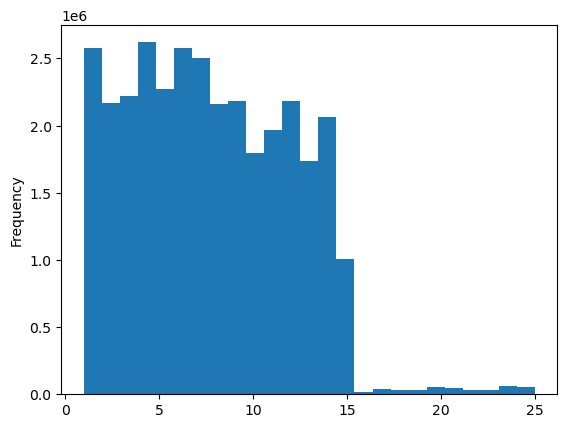

In [11]:
hist=df_ords_customers['prices'].plot.hist(bins=25)

In [12]:
#Line Chart with Sampling
np.random.seed(4)
dev = np.random.rand(len(df_ords_customers)) <= 0.7

In [13]:
big = df_ords_customers[dev]

In [14]:
small = df_ords_customers[~dev]

In [15]:
df_2 = small[['orders_day_of_week','prices']]

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

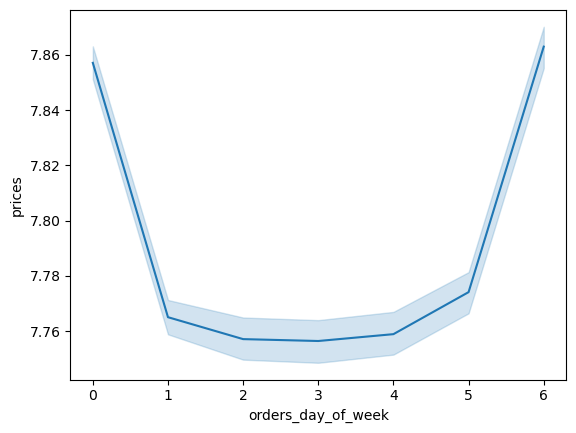

In [16]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

03. Task

In [17]:
#Question 3-Order Hour of the Day Histogram
df_ords_customers.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2         907        Premium Sliced Bacon       106             12    20.0   
3         907        Premium Sliced Bacon       106             12    20.0   
4        1000                    Apricots        18             10    12.9   

   order_id user_id  order_number  orders_day_of_week  order_hour_of_day  ...  \
0   3139998     138            28                   6                 11  ...   
1   1977647     138            30                   6                 17  ...   
2   3160996     138             1                   5                 13  ...   
3   2254091     138            10                   5                 14  ...   
4    505689     138             9                   6                 12  ...   

   first_name  last_name  gender      state age date_joined n_dependants  \
0     Charles        Cox    Male  Minnesota  81  2019-08-01            1   
1     Charles        Cox    Male  Minnesota  81  2019-08-01            1   
2     Charles        Cox    Male  Minnesota  81  2019-08-01            1   
3     Charles        Cox    Male  Minnesota  81  2019-08-01            1   
4     Charles        Cox    Male  Minnesota  81  2019-08-01            1   

   fam_status income  _merge  
0     married  49620    both  
1     married  49620    both  
2     married  49620    both  
3     married  49620    both  
4     married  49620    both  

[5 rows x 33 columns]

In [18]:
df_ohoy = df_ords_customers[['order_hour_of_day']]

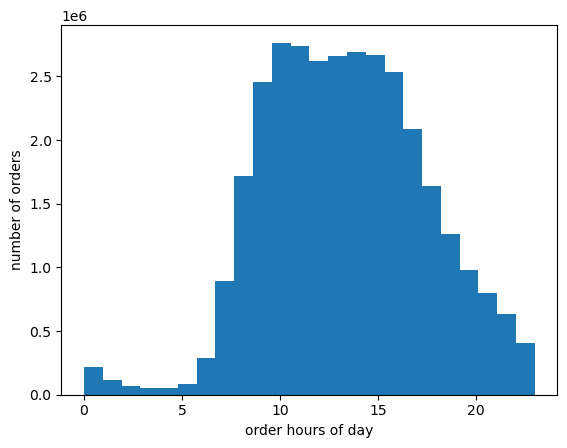

In [19]:
hist_ohoy = df_ohoy['order_hour_of_day'].plot.hist(bins=24, xlabel='order hours of day', ylabel='number of orders')

The histogram shows most orders are placed between 10 AM and 4 PM.  Midnight until around 6 AM is the slowest part of the day with another slow part being at the end of the day starting around 8 PM.

In [20]:
#Export Histogram
hist_ohoy.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_hours_distribution.png'))

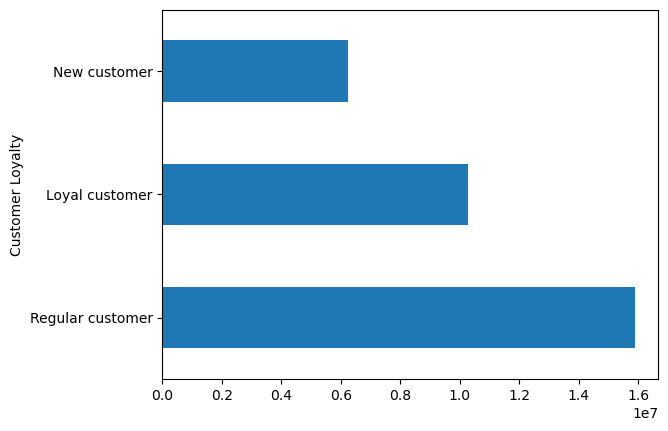

In [21]:
#Question 4-Customer Loyalty Orders
bar_loyal = df_ords_customers['loyalty_flag'].value_counts().plot.barh(ylabel="Customer Loyalty", x="Number of Orders")

From this bar chart, regular customers place the most number of orders with loyal customers coming in second and new customers placing the fewest orders.

In [22]:
#Export Bar Chart
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag_distribution.png'))

In [23]:
#Question 5-Expenditures and Time of Day
#Use relevant columns only
df_small_ohod_prices = small[['order_hour_of_day', 'prices']]
df_small_ohod_prices.head()

order_hour_of_day  prices
0                  11     5.8
2                  13    20.0
3                  14    20.0
6                  13     4.4
10                  9    12.8

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

[Text(0.5, 0, 'order hours of day')]

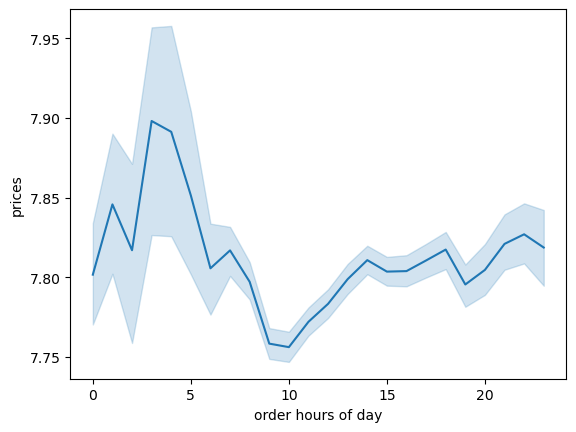

In [24]:
#Create Line Graph
line_ohod_prices = sns.lineplot(data=df_small_ohod_prices, x='order_hour_of_day', y='prices')
line_ohod_prices.set(xlabel='order hours of day')

Prices(expenditures) are highest around 4 AM and are lowest around 10 AM.

In [25]:
#Export Line Graph
line_ohod_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hours_vs_prices.png'))

In [26]:
#Question 6-Age and Dependants
#Create Dataframe with just Age and Number of Dependants
df_age_dependants = df_ords_customers[['age','n_dependants']]

In [27]:
df_age_dependants.head()

age  n_dependants
0   81             1
1   81             1
2   81             1
3   81             1
4   81             1

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

[Text(0.5, 0, 'age'), Text(0, 0.5, 'number of dependants')]

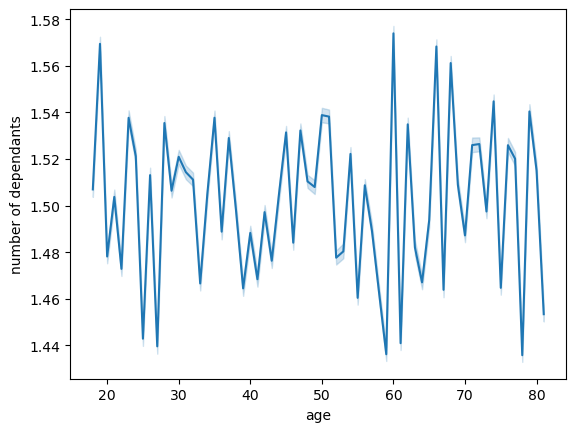

In [28]:
#Create Line Graph to Check for Correlation
line_age_ndependants = sns.lineplot(data=df_age_dependants, x='age', y='n_dependants')
line_age_ndependants.set(xlabel='age', ylabel='number of dependants')

There does not appear to be any correlation between age and number of dependants according to this line graph.

In [29]:
#Export Line Graph
line_age_ndependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_ndependants.png'))

In [30]:
#Question 7-Age vs Spending Power(Income)
#Create Dataframe with Age and Income only
df_age_income = df_ords_customers[['age', 'income']]
df_age_income.head()

age  income
0   81   49620
1   81   49620
2   81   49620
3   81   49620
4   81   49620

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


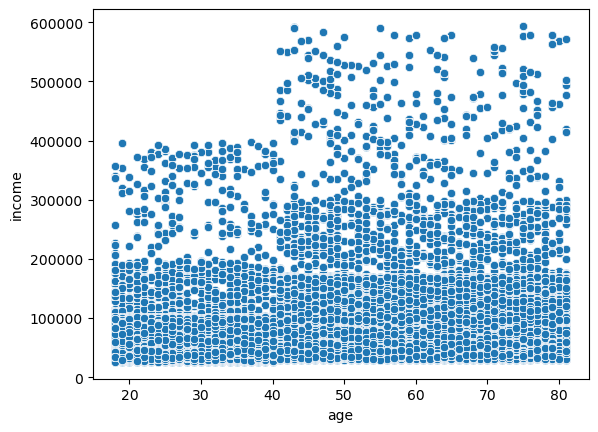

In [31]:
#Create a Scatterplot
scatter_age_income = sns.scatterplot(x='age', y='income', data=df_age_income)

There is an increase in income after age 40.  Most people who use Instacart make less than 200,000.  Younger people (age 18-40) do not make more than 400,000.

In [32]:
#Export Scatterplot
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))